In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [3]:
data = pd.read_csv('/content/order.csv')
data = data.dropna()
data.head()

,order_id,date,time,product_id,quantity,class_no
0,44651288,2022/3/31,6:55:15,10003,1,A001
1,44651288,2022/3/31,6:55:15,10050,1,A002
2,44651288,2022/3/31,6:55:15,10082,3,A006
3,44651288,2022/3/31,6:55:15,10651,2,G060
4,44651288,2022/3/31,6:55:15,10666,2,G061


In [ ]:
data.shape

(4237, 5)

In [4]:
# 熱銷商品
popular_products = pd.DataFrame(data.groupby('product_id')['quantity'].count())
most_popular = popular_products.sort_values('quantity', ascending=False)
most_popular
popular = most_popular.index[(most_popular['quantity'] > 15)].tolist()
popular

[10172,
 10171,
 10250,
 10346,
 10274,
 10246,
 10244,
 10357,
 10332,
 10202,
 10248,
 10689,
 10242,
 10203,
 10330,
 10341,
 10238,
 10010,
 10201,
 10352,
 10356,
 10275,
 10694,
 10433,
 10008,
 10282,
 10200,
 10693,
 10721,
 10728,
 10009,
 10360]

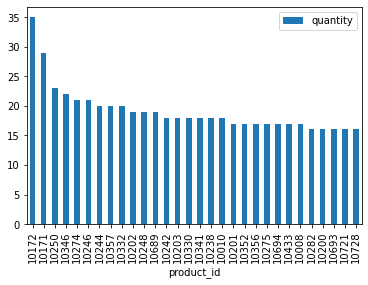

In [5]:
most_popular.head(30).plot(kind = "bar")

In [6]:
# 基於 其他客戶的購買多少數量歷史當作評分 去推薦
matrix = data.pivot_table(values='quantity', index='order_id', columns='product_id', fill_value=0)


In [13]:
matrix

product_id,10001,10002,10003,10004,10005,10006,10007,10008,10009,10010,...,10780,10781,10782,10783,10784,10785,10787,10788,10792,10794
order_id,,,,,,,,,,,,,,,,,,,,,
44621036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
44621257,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44621664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44621691,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44621709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44681702,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
44681802,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44681838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = matrix.T
X

order_id,44621036,44621257,44621664,44621691,44621709,44621737,44621765,44621859,44621959,44622017,...,44680696,44680797,44680812,44680823,44681627,44681702,44681802,44681838,44681851,44681862
product_id,,,,,,,,,,,,,,,,,,,,,
10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X.shape

(737, 449)

In [11]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
decomposed_matrix

array([[ 0.54004496, -0.40109591,  0.43274851, ...,  0.18994679,
         0.13914776, -0.18340458],
       [ 0.66785745,  0.48938462,  0.5293798 , ..., -0.13260875,
        -0.00082289, -0.02752708],
       [ 0.78654743, -0.15365339,  0.02706549, ...,  0.28886976,
         0.33237037,  0.15838559],
       ...,
       [ 0.09331478, -0.02282582, -0.05564643, ..., -0.03171962,
         0.02035224,  0.09807535],
       [ 0.18248862,  0.03547598, -0.03706382, ..., -0.12308427,
        -0.08600736, -0.30591234],
       [ 0.4102811 , -0.22648793, -0.13077545, ...,  0.05860794,
        -0.23484851,  0.43868499]])

In [12]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape
correlation_matrix

array([[ 1.        ,  0.23190292,  0.57981785, ...,  0.04791601,
         0.25568334,  0.24647064],
       [ 0.23190292,  1.        ,  0.18742525, ..., -0.35480874,
         0.35239886,  0.53968044],
       [ 0.57981785,  0.18742525,  1.        , ...,  0.49702349,
         0.25992147,  0.55216813],
       ...,
       [ 0.04791601, -0.35480874,  0.49702349, ...,  1.        ,
        -0.07580169,  0.24042908],
       [ 0.25568334,  0.35239886,  0.25992147, ..., -0.07580169,
         1.        , -0.29766955],
       [ 0.24647064,  0.53968044,  0.55216813, ...,  0.24042908,
        -0.29766955,  1.        ]])

In [ ]:
X.index[200]

10215

In [ ]:
i = "10001"

product_names = list(X.index)
product_ID = product_names.index(int(i))
product_ID 

0

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape
import random 

Recommend = list(X.index[correlation_product_ID > 0.93])

# Removes the item already bought by the customer
Recommend.remove(int(i)) 

P = Recommend[0:9]
# for i in P:
if P != []:
  print(P)
else:
  ac= random.sample(popular, 3) 
  print(ac)

[10694, 10009, 10357]


In [ ]:
p = pd.read_csv('/content/product.csv')
d = pd.DataFrame(p)


In [ ]:
def check_id(dataframe, class_no):
    product_name = d[d['product_id'] == class_no]['product'].values[0]
    print(product_name)

In [ ]:
check_id(d, 10231)

【RMK】眼頰多采棒 6.7g(6色任選)
